<a href="https://colab.research.google.com/github/mustafabozkaya/hands-on-transfer-learning-with-python/blob/master/notebooks/Ch05%20-%20Unleash%20the%20Power%20of%20Transfer%20Learning/VGGBase_Newhead(8192_1)_Transfer_learning_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://medium.com/unpackai/how-to-use-kaggle-datasets-in-google-colab-f9b2e4b5767c

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#!pip install kaggle

In [4]:
%ls

drive/  sample_data/


In [7]:
#@title Download kaggle dataset after rules aggreed
#!kaggle competitions download -c dogs-vs-cats

In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggledatasets/"

In [6]:
#%cd drive/MyDrive/kaggledatasets/

In [8]:
%cd /content/

/content


In [9]:
%ls

drive/  sample_data/


In [10]:
DATA_DIR = './githupfolder/'

# load repo with data if it is not exists
if not os.path.exists(DATA_DIR):
    print('Loading data...')
    os.system('git clone https://github.com/dipanjanS/hands-on-transfer-learning-with-python ./githupfolder')
    print('Done!')

Loading data...
Done!


In [11]:
!unzip "/content/drive/MyDrive/kaggledatasets/train.zip" -d "/content/githupfolder/notebooks/datasets"

Streaming output truncated to the last 5000 lines.
  inflating: /content/githupfolder/notebooks/datasets/train/dog.5499.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.55.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.550.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.5500.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.5501.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.5502.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.5503.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.5504.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.5505.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.5506.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.5507.jpg  
  inflating: /content/githupfolder/notebooks/datasets/train/dog.5508.jpg  
  inflating: /content/githupfolder/notebooks/dataset

# Data loader processing

In [14]:
%cd /

/


In [15]:
%cd content/githupfolder/notebooks/Ch05\ -\ Unleash\ the\ Power\ of\ Transfer\ Learning

/content/githupfolder/notebooks/Ch05 - Unleash the Power of Transfer Learning


In [17]:
import glob
import numpy as np
import os
import shutil
from utils import log_progress
import cv2 as cv
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(18,8)
%matplotlib inline
np.random.seed(42)

In [18]:
%pwd

'/content/githupfolder/notebooks/Ch05 - Unleash the Power of Transfer Learning'

In [19]:
files = np.array(glob.glob('../datasets/train/*'))
files.shape

(25000,)

In [20]:
files[:5]

array(['../datasets/train/dog.51.jpg', '../datasets/train/dog.822.jpg',
       '../datasets/train/cat.11024.jpg',
       '../datasets/train/cat.7047.jpg', '../datasets/train/cat.8557.jpg'],
      dtype='<U31')

In [21]:
cat_files = [fn for fn in files if 'cat' in fn]
dog_files = [fn for fn in files if 'dog' in fn]
len(cat_files), len(dog_files)

(12500, 12500)

In [22]:
img_=dog_files[1000]

In [23]:
#cv.imshow("cat image",cat_files[21])
img=cv.imread(img_)
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)



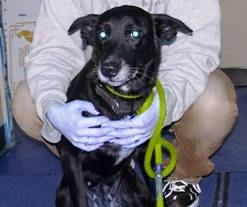

In [24]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [26]:
cat_train = np.random.choice(cat_files, size=1500, replace=False)
dog_train = np.random.choice(dog_files, size=1500, replace=False)
cat_files = list(set(cat_files) - set(cat_train))
dog_files = list(set(dog_files) - set(dog_train))

cat_val = np.random.choice(cat_files, size=500, replace=False)
dog_val = np.random.choice(dog_files, size=500, replace=False)
cat_files = list(set(cat_files) - set(cat_val))
dog_files = list(set(dog_files) - set(dog_val))

cat_test = np.random.choice(cat_files, size=500, replace=False)
dog_test = np.random.choice(dog_files, size=500, replace=False)

print('Cat datasets:', cat_train.shape, cat_val.shape, cat_test.shape)
print('Dog datasets:', dog_train.shape, dog_val.shape, dog_test.shape)

Cat datasets: (1500,) (500,) (500,)
Dog datasets: (1500,) (500,) (500,)


In [27]:
cat_train[:2],dog_train[:2]

(array(['../datasets/train/cat.2541.jpg', '../datasets/train/cat.6252.jpg'],
       dtype='<U31'),
 array(['../datasets/train/dog.4028.jpg', '../datasets/train/dog.8123.jpg'],
       dtype='<U31'))

In [28]:

train_files = np.concatenate([cat_train, dog_train])
validate_files = np.concatenate([cat_val, dog_val])
test_files = np.concatenate([cat_test, dog_test])


In [29]:
print('train datasets:', train_files.shape, validate_files.shape, test_files.shape)

train datasets: (3000,) (1000,) (1000,)


In [30]:
data_dir="/content/githupfolder/notebooks/datasets/dog_cat"
if not os.path.exists(data_dir):
  os.mkdir(data_dir)

train_dir = "train_data"
val_dir = "validation_data"
test_dir = "test_data"


In [31]:
os.chdir("/content/githupfolder/notebooks/Ch05 - Unleash the Power of Transfer Learning/")


In [32]:
os.mkdir(os.path.join(data_dir,train_dir)) if not os.path.exists(os.path.join(data_dir,train_dir)) else None
os.mkdir(os.path.join(data_dir,val_dir)) if not os.path.exists(os.path.join(data_dir,val_dir)) else None
os.mkdir(os.path.join(data_dir,test_dir)) if not os.path.exists(os.path.join(data_dir,test_dir)) else None

for fn in log_progress(train_files, name='Training Images'):
    shutil.copy(fn, os.path.join(data_dir,train_dir))

for fn in log_progress(validate_files, name='Validation Images'):
    shutil.copy(fn, os.path.join(data_dir,val_dir) )
    
for fn in log_progress(test_files, name='Test Images'):
    shutil.copy(fn, os.path.join(data_dir,test_dir) )

In [33]:
%ls

'Basic CNN Model.ipynb'               model_evaluation_utils.py
'CNN with Image Augmentation.ipynb'  'Model Performance Evaluations.ipynb'
'CNN with Transfer Learning.ipynb'    __pycache__/
'Datasets Builder.ipynb'              utils.py


In [34]:
import pandas as pd
train_=pd.DataFrame([image_f for image_f in os.listdir(os.path.join(data_dir,train_dir))],columns=["img_file"])


In [35]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_file  3000 non-null   object
dtypes: object(1)
memory usage: 23.6+ KB


# İmage Preparing and EDA

In [36]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img


In [37]:
 IMG_DIM = (150, 150)

train_files = glob.glob(str(os.path.join(data_dir,train_dir))+'/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[7].split(".")[0].strip() for fn in train_files]

validation_files =  glob.glob(str(os.path.join(data_dir,val_dir))+'/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[7].split(".")[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape,
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [38]:
#(str(os.path.join(data_dir,train_dir))+'/*')

## İmage proprocessing , Scalling and Label encoder

In [39]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255
train_imgs.shape

(3000, 150, 150, 3)

(150, 150, 3)


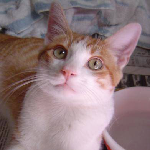

In [45]:
print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [46]:
# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[1495:1505], train_labels_enc[1495:1505])

['cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog'] [0 0 1 1 1 1 1 0 0 1]


## Sample image Hist Plotting

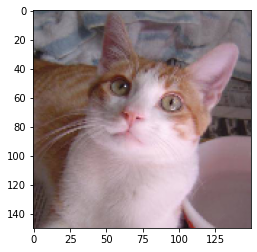

In [41]:
plt.imshow(train_imgs_scaled[0])

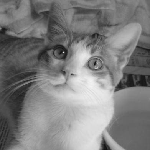

In [42]:
# convert the image to grayscale and create a histogram
cv_img=train_imgs[0]
cv_img = cv.cvtColor(cv_img, cv.COLOR_BGR2GRAY)
cv2_imshow(cv_img)


(0.0, 256.0)

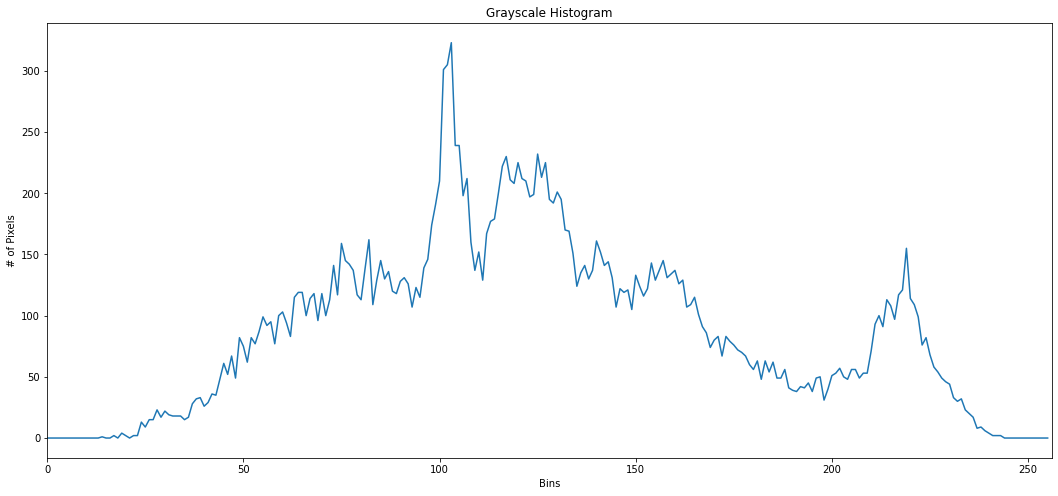

In [43]:
hist = cv.calcHist([cv_img], [0], None, [256], [0, 256])
plt.figure(figsize=(18,8))
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

## Computing a Flattened Color Histogram using Python and OpenCV

flattened feature vector size: %(768,) 


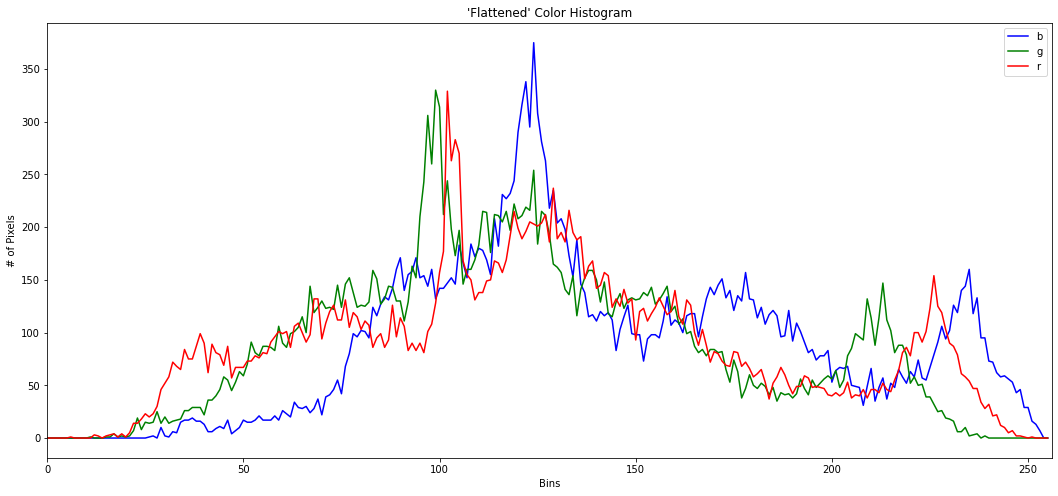

In [44]:

# grab the image channels, initialize the tuple of colors,
# the figure and the flattened feature vector
cv_img=train_imgs[0]
chans = cv.split(cv_img)
colors = ("b", "g", "r")
plt.figure(figsize=(18,8))
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and
	# concatenate the resulting histograms for each
	# channel
	hist = cv.calcHist([chan], [0], None, [256], [0, 256])
	features.extend(hist)
	# plot the histogram
	plt.plot(hist, color = color)
	plt.xlim([0, 256])
 
plt.legend(colors)
# here we are simply showing the dimensionality of the
# flattened color histogram 256 bins for each channel
# x 3 channels = 768 total values -- in practice, we would
# normally not use 256 bins for each channel, a choice
# between 32-96 bins are normally used, but this tends
# to be application dependent
print ("flattened feature vector size: %{0} ".format(np.array(features).flatten().shape))

# **Transfer learning**

In [47]:
batch_size = 30
num_classes = 2
epochs = 15
input_shape = (150, 150, 3)


### VGG_16 full model

In [51]:
from keras.applications import vgg16
from keras.models import Model
import keras
import tensorflow as tf


vggfull= vgg16.VGG16(include_top=True, weights='imagenet')

vggfull.summary()

553476096/553467096 [==============================] - 24s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

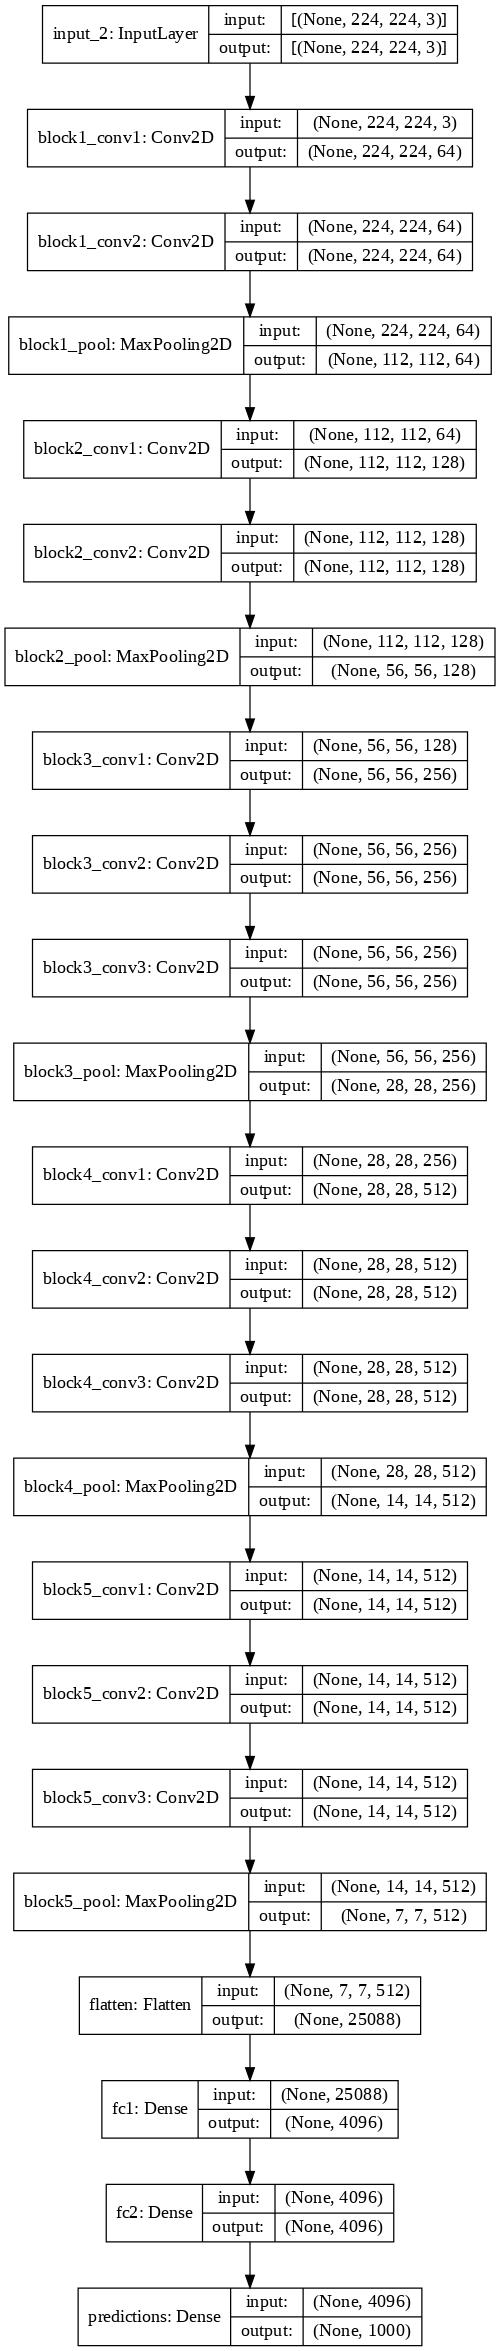

In [52]:
from tensorflow.keras.utils import  plot_model
data_dir="/content/githupfolder/notebooks/models"
if not os.path.exists(data_dir):
  os.mkdir(data_dir)
plot_model(vggfull,to_file="../models/VGG16Fullmodel.png",show_shapes=True, 
                 show_layer_names=True, rankdir='TB',dpi=90)

## VGG base Model

In [48]:
from keras.applications import vgg16
from keras.models import Model
import keras
import tensorflow as tf


vgg_base = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)
vgg_base.summary()

58900480/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

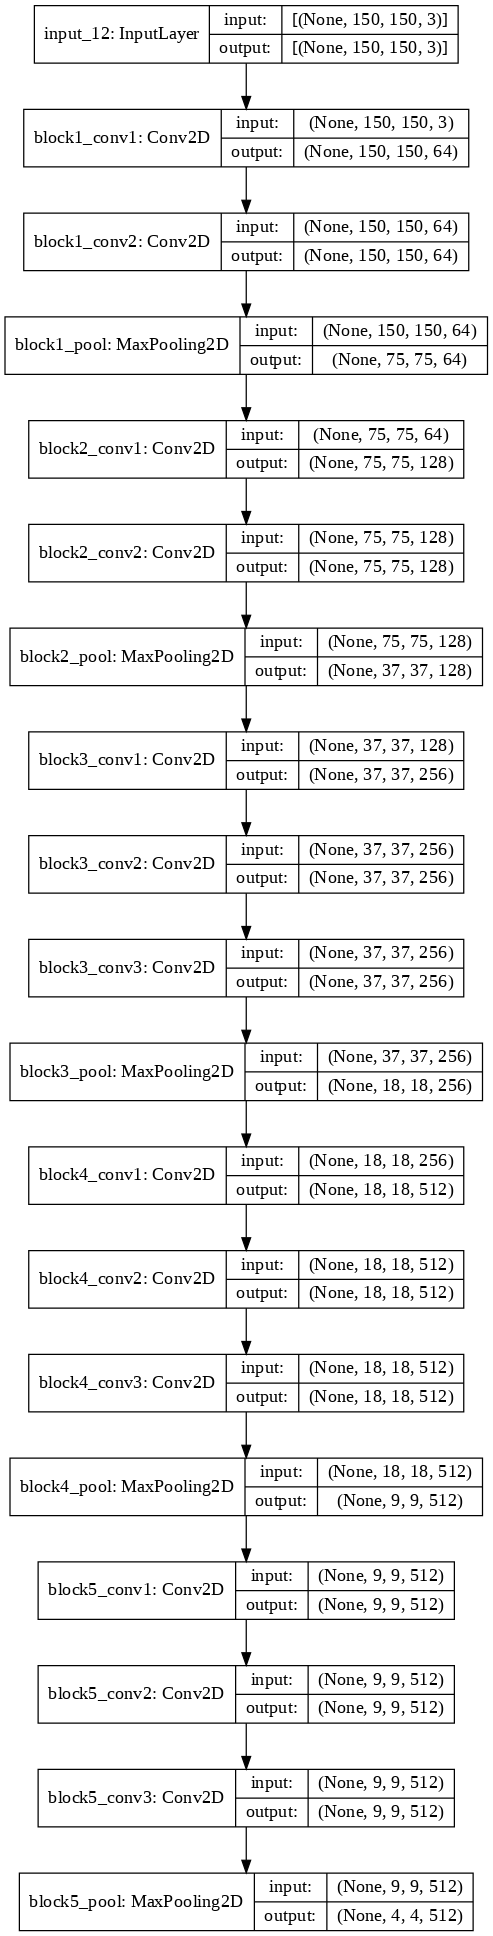

In [ ]:
plot_model(vgg_base,to_file="../models/Transferlearning_VGG16base.png",show_shapes=True, 
                 show_layer_names=True, rankdir='TB',dpi=90)

## import Flatten layer to VGG base model

In [49]:
output = vgg_base.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg_base.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

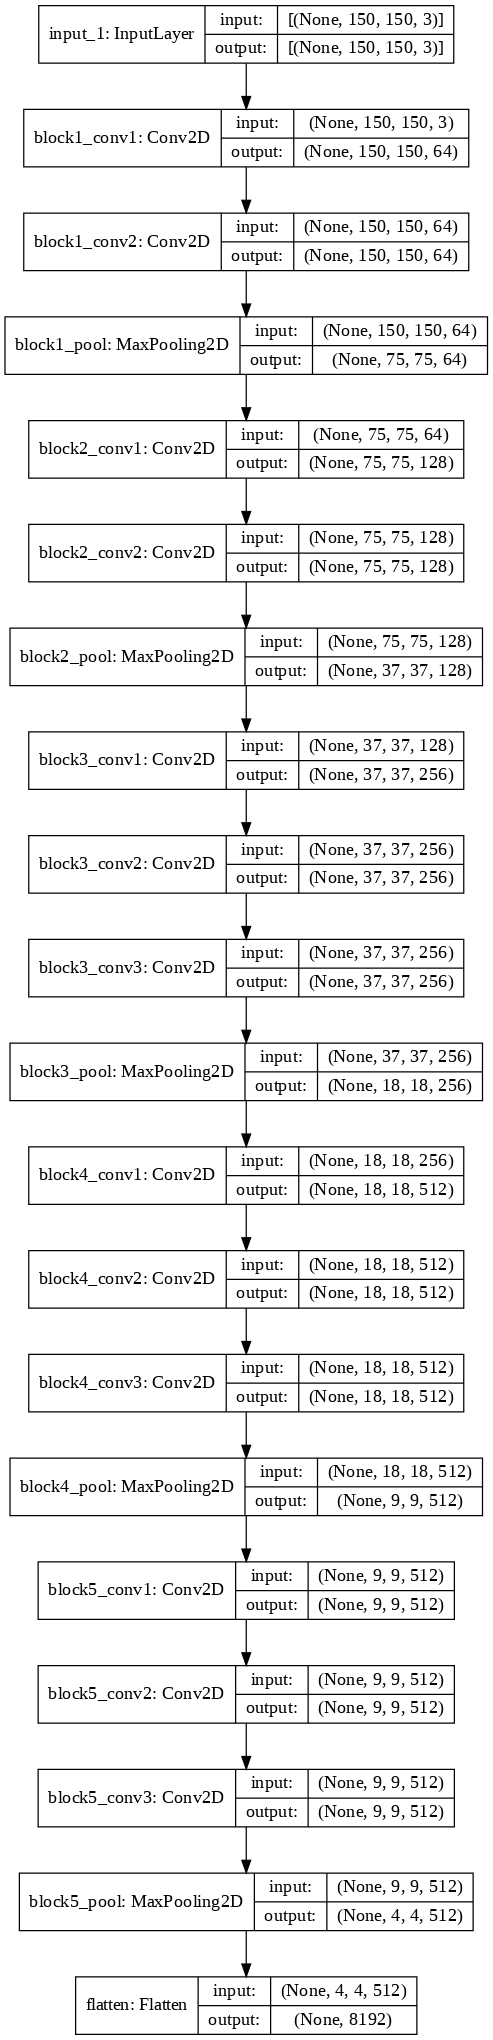

In [53]:

plot_model(vgg_model,to_file="../models/Transferlearning_VGG16base_addFlatten.png",show_shapes=True, 
                 show_layer_names=True, rankdir='TB',dpi=90)

In [54]:
import pandas as pd
pd.set_option('max_colwidth', None)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f7b8a9467d0>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7f7b8a97eed0>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f7b8a91c990>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f7b8a8a1cd0>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f7b800e8510>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f7b800f2150>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f7b800e8110>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f7b800f4c90>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f7b80102350>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f7b80107c10>,block3_conv3,False


In [55]:
print("Trainable layers:", len(vgg_model.trainable_weights))

Trainable layers: 0


In [56]:
print("non-Trainable layers:", len(vgg_model.non_trainable_weights))

non-Trainable layers: 26


In [ ]:
#train_imgs_scaled[:1].squeeze().shape

(150, 150, 3)

## Feature Extructure from VGG base model

(1, 4, 4, 512)
(1, 150, 150, 3)


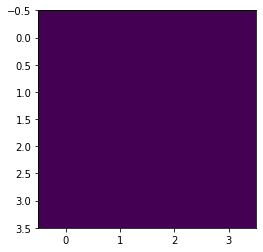

In [58]:
bottleneck_feature_vggBase = vgg_base.predict(train_imgs_scaled[:1])
print(bottleneck_feature_vggBase.shape)
print(train_imgs_scaled[0:1].shape)
plt.imshow(bottleneck_feature_vggBase[0][:,:,51])

In [59]:
def get_bottleneck_features(model, input_imgs):
    
    features = model.predict(input_imgs, verbose=0)
    return features

In [63]:
train_features_vggmodel = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vggmodel = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features from vgg_model :', train_features_vggmodel.shape, 
      '\tValidation Bottleneck Features from vgg_model:', validation_features_vggmodel.shape)

Train Bottleneck Features from vgg_model : (3000, 8192) 	Validation Bottleneck Features from vgg_model: (1000, 8192)


In [64]:
vgg_base.input_shape,vgg_base.output_shape,vgg_model.input_shape,vgg_model.output_shape

((None, 150, 150, 3), (None, 4, 4, 512), (None, 150, 150, 3), (None, 8192))

## VGG_model (base) for feature extraction and New Head for classifier

In [65]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from tensorflow.keras import optimizers

input_shape = vgg_model.output_shape[1]

model_head = Sequential([
                     InputLayer(input_shape=(input_shape,),name="input layer")
                    ,Dense(512, activation='relu', input_dim=input_shape)
                    ,Dropout(0.3)
                    ,Dense(512, activation='relu')
                    ,Dropout(0.3)
                    ,Dense(1, activation='sigmoid')
])

model_head.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['binary_accuracy'])

model_head.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


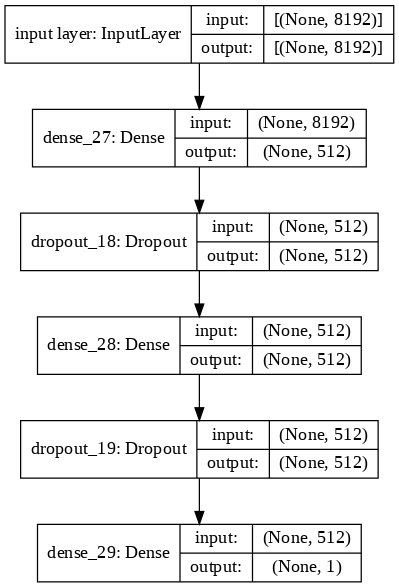

In [ ]:
model.input_shape,model.output_shape
plot_model(model_head,to_file="../models/new_head_model.png",show_shapes=True, 
                 show_layer_names=True, rankdir='TB',dpi=90)

In [ ]:
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1)

Epoch 1/30
100/100 [==============================] - 1s 9ms/step - loss: 4.3348e-07 - binary_accuracy: 1.0000 - val_loss: 1.2751 - val_binary_accuracy: 0.9010
Epoch 2/30
100/100 [==============================] - 1s 7ms/step - loss: 1.1409e-05 - binary_accuracy: 1.0000 - val_loss: 1.3209 - val_binary_accuracy: 0.9010
Epoch 3/30
100/100 [==============================] - 1s 8ms/step - loss: 5.9074e-04 - binary_accuracy: 0.9997 - val_loss: 1.3487 - val_binary_accuracy: 0.9000
Epoch 4/30
100/100 [==============================] - 1s 7ms/step - loss: 0.0041 - binary_accuracy: 0.9990 - val_loss: 1.4214 - val_binary_accuracy: 0.8980
Epoch 5/30
100/100 [==============================] - 1s 7ms/step - loss: 8.2327e-05 - binary_accuracy: 1.0000 - val_loss: 1.6326 - val_binary_accuracy: 0.8870
Epoch 6/30
100/100 [==============================] - 1s 8ms/step - loss: 6.6373e-05 - binary_accuracy: 1.0000 - val_loss: 1.2608 - val_binary_accuracy: 0.9020
Epoch 7/30
100/100 [========================

In [ ]:

pd.DataFrame(history.history)

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,4.334758e-07,1.000000,1.275059,0.901
1,1.140867e-05,1.000000,1.320882,0.901
2,5.907424e-04,0.999667,1.348727,0.900
3,4.119686e-03,0.999000,1.421397,0.898
4,8.232656e-05,1.000000,1.632573,0.887
5,6.637337e-05,1.000000,1.260785,0.902
6,8.274405e-06,1.000000,1.379308,0.904
7,4.928015e-03,0.998333,1.452686,0.897
8,1.828851e-06,1.000000,1.397170,0.899
9,5.383790e-08,1.000000,1.523610,0.896


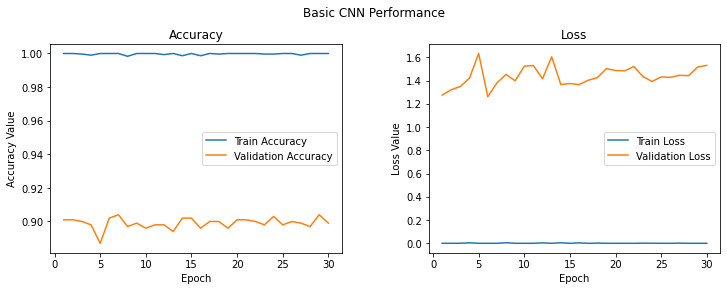

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) Performans', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['binary_accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_binary_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model.save('../models/cats_dogs_vggbase_newHead_model.h5')

## İmage Data Genarator for overfitting

In [66]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255, zoom_range=0.2, rotation_range=30,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)


### **lets see images how to transformed  from image data generator**





In [ ]:
img_id = 9900
cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

In [ ]:
model2 = Sequential([
                  vgg_model
                  ,Dense(512, activation='relu', input_dim=input_shape)
                  ,Dropout(0.3)
                  ,Dense(512, activation='relu')
                  ,Dropout(0.3)
                  ,Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['binary_accuracy'])

model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Functional)         (None, 8192)              14714688  
_________________________________________________________________
dense_33 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 513       
Total params: 19,172,673
Trainable params: 4,457,985
Non-trainable params: 14,714,688
_________________________________

In [ ]:
history2=model2.fit(train_generator
           ,epochs=30,verbose=1,
           steps_per_epoch=100,
           validation_data=val_generator)

Epoch 1/30
100/100 [==============================] - 27s 267ms/step - loss: 0.2767 - binary_accuracy: 0.8847 - val_loss: 0.2351 - val_binary_accuracy: 0.9050
Epoch 2/30
100/100 [==============================] - 27s 269ms/step - loss: 0.2968 - binary_accuracy: 0.8673 - val_loss: 0.2316 - val_binary_accuracy: 0.9090
Epoch 3/30
100/100 [==============================] - 27s 270ms/step - loss: 0.2957 - binary_accuracy: 0.8740 - val_loss: 0.2329 - val_binary_accuracy: 0.9070
Epoch 4/30
100/100 [==============================] - 27s 268ms/step - loss: 0.2817 - binary_accuracy: 0.8817 - val_loss: 0.2327 - val_binary_accuracy: 0.9080
Epoch 5/30
100/100 [==============================] - 27s 271ms/step - loss: 0.2808 - binary_accuracy: 0.8820 - val_loss: 0.2321 - val_binary_accuracy: 0.9040
Epoch 6/30
100/100 [==============================] - 27s 272ms/step - loss: 0.2921 - binary_accuracy: 0.8680 - val_loss: 0.2434 - val_binary_accuracy: 0.8990
Epoch 7/30
100/100 [==========================

In [ ]:
pd.DataFrame(history2.history)

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.276725,0.884667,0.235104,0.905
1,0.296767,0.867333,0.231632,0.909
2,0.295674,0.874000,0.232876,0.907
3,0.281665,0.881667,0.232742,0.908
4,0.280835,0.882000,0.232120,0.904
5,0.292091,0.868000,0.243407,0.899
6,0.281422,0.878667,0.234375,0.903
7,0.279794,0.878333,0.233146,0.904
8,0.264639,0.883667,0.237002,0.906
9,0.276012,0.882333,0.234189,0.906


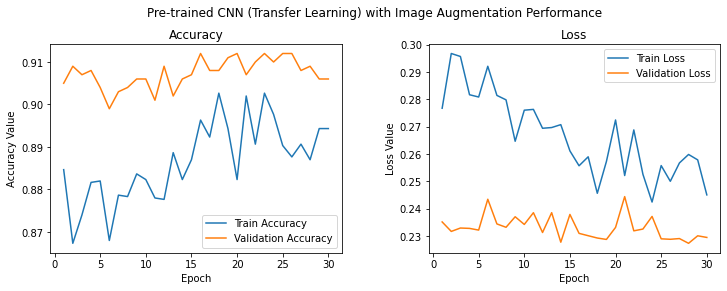

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history2.history['binary_accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history2.history['val_binary_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history2.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history2.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model.save('../models/cats_dogs_tlearn_img_aug_cnn.h5')

## ** Fine Tunnig With İmage Data Augmantion for Owerfitting**

In [74]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        

In [75]:
print("Trainable layers:", len(vgg_model.trainable_weights))

Trainable layers: 12


In [76]:
print("non-Trainable layers:", len(vgg_model.non_trainable_weights))

non-Trainable layers: 14


In [77]:
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f7b8a9467d0>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7f7b8a97eed0>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f7b8a91c990>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f7b8a8a1cd0>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f7b800e8510>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f7b800f2150>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f7b800e8110>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f7b800f4c90>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f7b80102350>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f7b80107c10>,block3_conv3,False


In [78]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255, zoom_range=0.2, rotation_range=30,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [79]:
model3 = Sequential([
                  vgg_model
                  ,Dense(512, activation='relu', input_dim=input_shape)
                  ,Dropout(0.3)
                  ,Dense(512, activation='relu')
                  ,Dropout(0.3)
                  ,Dense(1, activation='sigmoid')
])

model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['binary_accuracy'])

model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 8192)              14714688  
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 19,172,673
Trainable params: 17,437,185
Non-trainable params: 1,735,488
__________________________________

In [80]:
histor32=model3.fit(train_generator
           ,epochs=30,verbose=1,
           steps_per_epoch=100,
           validation_data=val_generator)

Epoch 1/30
100/100 [==============================] - 42s 339ms/step - loss: 0.4943 - binary_accuracy: 0.7490 - val_loss: 0.2755 - val_binary_accuracy: 0.8900
Epoch 2/30
100/100 [==============================] - 31s 305ms/step - loss: 0.3270 - binary_accuracy: 0.8640 - val_loss: 0.1987 - val_binary_accuracy: 0.9240
Epoch 3/30
100/100 [==============================] - 31s 306ms/step - loss: 0.2422 - binary_accuracy: 0.9017 - val_loss: 0.1961 - val_binary_accuracy: 0.9290
Epoch 4/30
100/100 [==============================] - 31s 306ms/step - loss: 0.2190 - binary_accuracy: 0.9137 - val_loss: 0.1635 - val_binary_accuracy: 0.9410
Epoch 5/30
100/100 [==============================] - 31s 305ms/step - loss: 0.1891 - binary_accuracy: 0.9253 - val_loss: 0.2394 - val_binary_accuracy: 0.9100
Epoch 6/30
100/100 [==============================] - 31s 306ms/step - loss: 0.1523 - binary_accuracy: 0.9367 - val_loss: 0.2194 - val_binary_accuracy: 0.9390
Epoch 7/30
100/100 [==========================

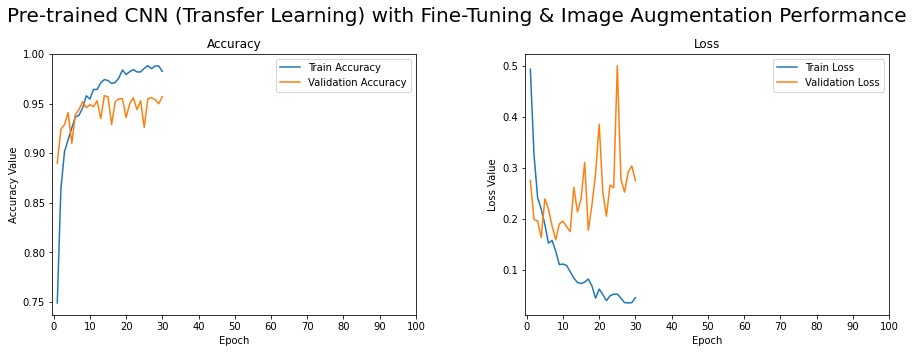

In [91]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Fine-Tuning & Image Augmentation Performance', fontsize=20)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, histor32.history['binary_accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, histor32.history['val_binary_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, histor32.history['loss'], label='Train Loss')
ax2.plot(epoch_list, histor32.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [93]:
model3.save('../models/cats_dogs_tlearn_finetune_img_aug_cnn.h5')